IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
sns.set(style="whitegrid")

DATA COLLECTION

In [5]:
# Load dataset from seaborn
df = sns.load_dataset("titanic")

DATA UNDERSTANDING

It is the process of exploring and getting familiar with your dataset.It involves looking at the data's format,structure,and content to identify any issues or inconsistencies that might need to be addressed before proceeding with further analysis.

In [7]:
# Display first 5 rows
df.head()
# Shape of dataset
df.shape
# Dataset information
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#Column names
df.columns
for i in df.columns:
  print(i)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


In [9]:
#Column Type
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [10]:
df.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [13]:
#shows duplicte values in each row if present
df.duplicated()
print(df.duplicated().sum())

107


In [12]:
#shows missing values in each column
df.isnull()
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


DATA CLEANING

It is the process of preparing the data for analysis by fixing or removing errors and inconsistencies

In [18]:
#Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)
df

C:\Users\Kanika\AppData\Local\Temp\ipykernel_20356\877125327.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\Kanika\AppData\Local\Temp\ipykernel_20356\1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [20]:
df.drop(columns=['deck'], inplace=True)


In [21]:
#Verifying missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [22]:
#Removing duplicate records
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [24]:
#Fixing errors(replacing wrong values with correct values)
df["sex"]=df["sex"].replace("male","Male")
df["sex"]=df["sex"].replace("female","Female")

DATA TRANSFORMATION

Data transformation in python involves converting data from one format or structure to another to make it suitable for analysis or modeling.

In [25]:
#changing data type for a specific column
df["age"]=df["age"].astype(int)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,Male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,Female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,Female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,Female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,Male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,Female,39,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,Female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,Female,28,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,Male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [27]:
#Feature Engineering : Creating new features
df["FamilyCount"]=df["sibsp"]+df["parch"]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,FamilyCount
0,0,3,Male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,Female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,Female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,Female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,Male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,Female,39,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,Female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,Female,28,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,Male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


DATA VISUALIZATION

It aims to represent data in a visual context to make it easier to undersatnd,highlight important aspects,and communicate findings effectively to stackholders.

Bar Plot (1 categorical value and 1 numerical column)
Line Plot (continuous values)
Scatter Plot (Relationship between 2 numerical columns)
Histogram (Distribution of 1 cloumn)

UNIVARIATE ANALYSIS

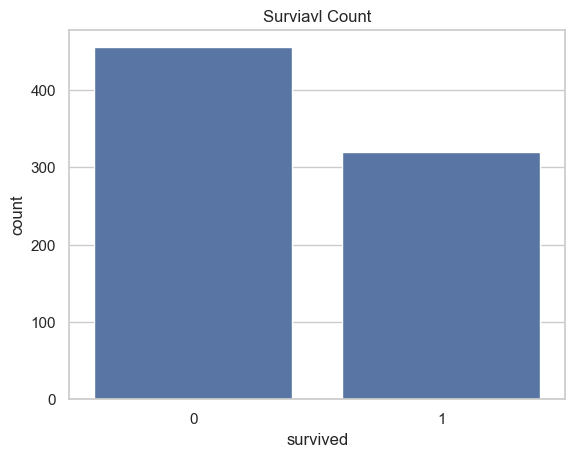

In [29]:
#Survival Count
sns.countplot(x='survived',data=df)
plt.title("Surviavl Count")
plt.show()

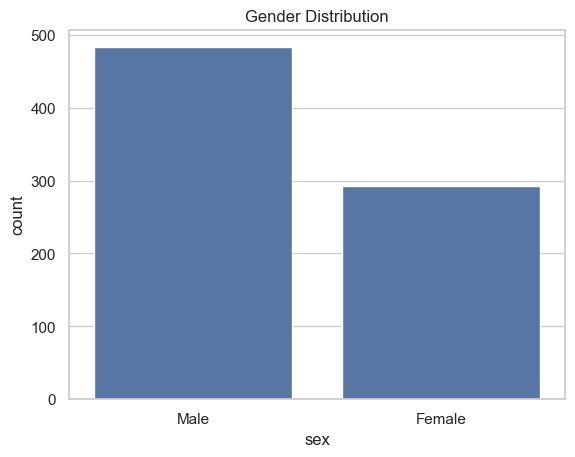

In [31]:
#Gender Distribution
sns.countplot(x='sex',data=df)
plt.title("Gender Distribution")
plt.show()

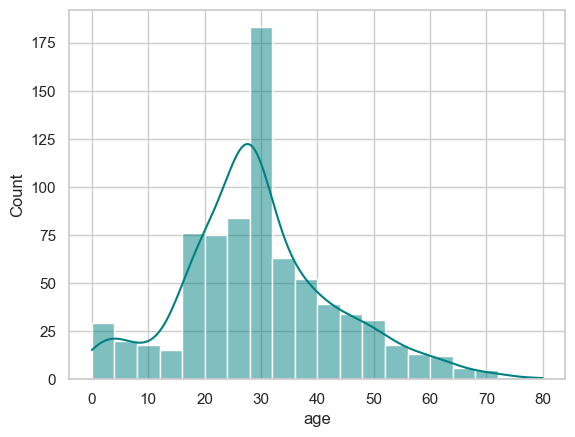

In [32]:
#Age Distribution
sns.histplot(df["age"],bins=20,color="teal",kde=True)
plt.show()

BIVARIATE ANALYSIS

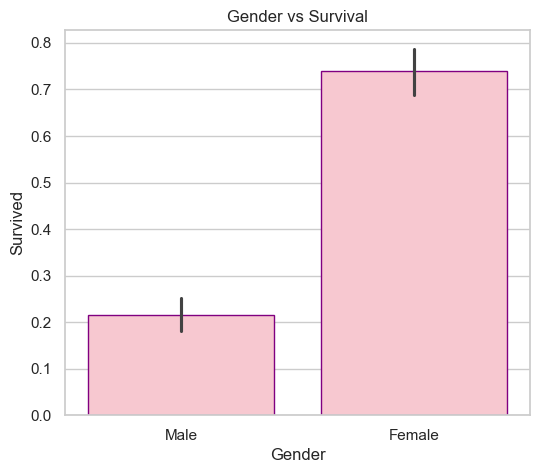

In [34]:
#Gender Vs Survival
plt.figure(figsize=(6,5))
sns.barplot(x='sex',y='survived',data=df,color="pink",edgecolor="purple")
plt.title("Gender vs Survival")
plt.xlabel("Gender")
plt.ylabel("Survived")
plt.show()

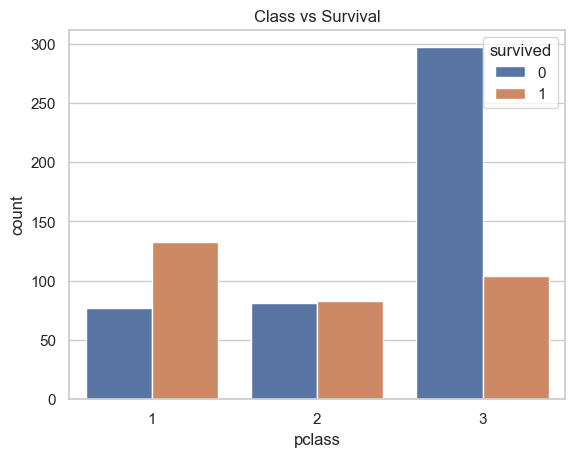

In [35]:
#Class vs Survival
sns.countplot(x='pclass',hue='survived',data=df)
plt.title("Class vs Survival")
plt.show()

MLUTIVARIATE ANALYSIS

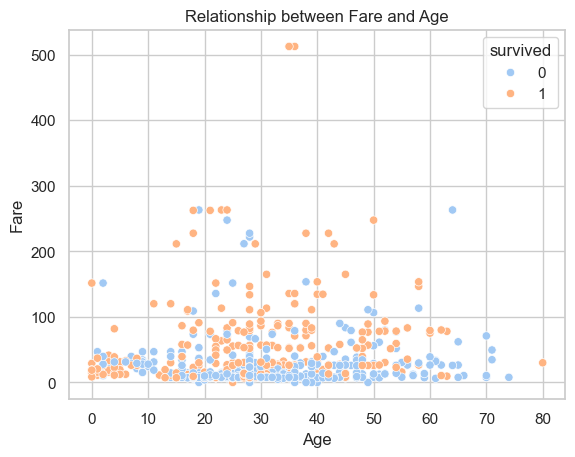

In [40]:
#Scatter Plot
sns.scatterplot(x='age',y='fare',data=df,hue="survived",palette='pastel')
plt.title("Relationship between Fare and Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

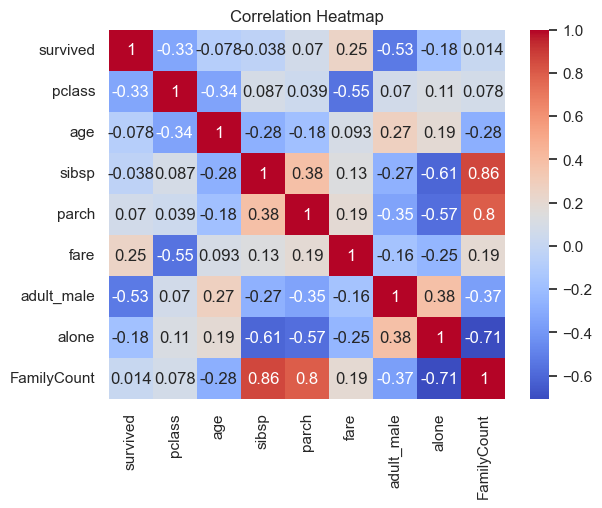

In [41]:
#Correlation Matrix
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

OUTLIER DETECTION

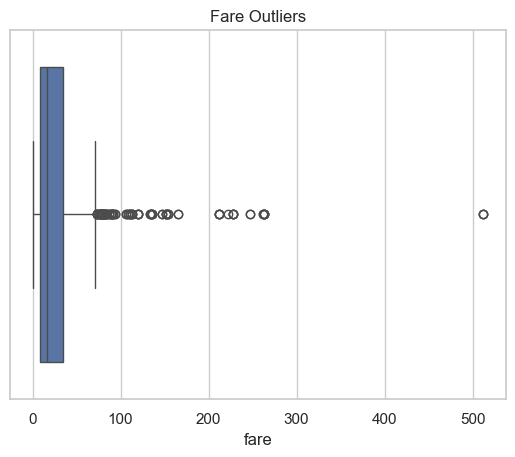

In [42]:
sns.boxplot(x=df['fare'])
plt.title("Fare Outliers")
plt.show()

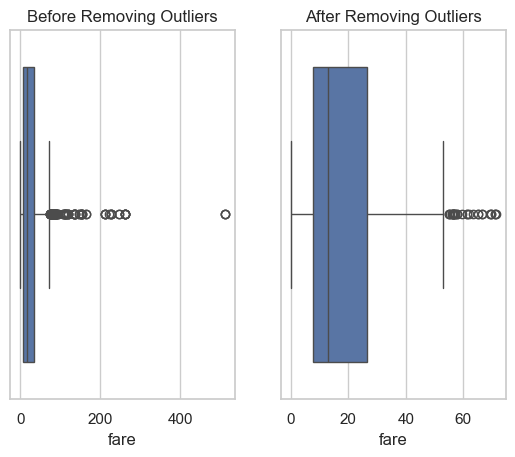

In [44]:
#Removing Outliers
Q1=df['fare'].quantile(0.25)
Q3=df['fare'].quantile(0.75)
IQR=Q3-Q1
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR
df_outliers=df[(df['fare']>=Lower_limit) & (df['fare']<=Upper_limit)]
df_outliers.shape

#Before Outliers
plt.subplot(1,2,1)
sns.boxplot(x=df['fare'])
plt.title("Before Removing Outliers")

#After Outliers
plt.subplot(1,2,2)
sns.boxplot(x=df_outliers['fare'])
plt.title("After Removing Outliers")

plt.show()

ENCODING CATEGORICAL VARIABLES

In [46]:
df_encoded=pd.get_dummies(df,columns=['sex','embarked'],drop_first=True)
df_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,FamilyCount,sex_Male,embarked_Q,embarked_S
0,0,3,22,1,0,7.2500,Third,man,True,Southampton,no,False,1,True,False,True
1,1,1,38,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1,False,False,False
2,1,3,26,0,0,7.9250,Third,woman,False,Southampton,yes,True,0,False,False,True
3,1,1,35,1,0,53.1000,First,woman,False,Southampton,yes,False,1,False,False,True
4,0,3,35,0,0,8.0500,Third,man,True,Southampton,no,True,0,True,False,True


FINAL DATASET AFTER EDA PROCESS

In [47]:
df_encoded.shape
df_encoded.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     775 non-null    int64   
 1   pclass       775 non-null    int64   
 2   age          775 non-null    int64   
 3   sibsp        775 non-null    int64   
 4   parch        775 non-null    int64   
 5   fare         775 non-null    float64 
 6   class        775 non-null    category
 7   who          775 non-null    object  
 8   adult_male   775 non-null    bool    
 9   embark_town  773 non-null    object  
 10  alive        775 non-null    object  
 11  alone        775 non-null    bool    
 12  FamilyCount  775 non-null    int64   
 13  sex_Male     775 non-null    bool    
 14  embarked_Q   775 non-null    bool    
 15  embarked_S   775 non-null    bool    
dtypes: bool(5), category(1), float64(1), int64(6), object(3)
memory usage: 71.3+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,FamilyCount
0,0,3,Male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False,1
1,1,1,Female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,1
2,1,3,Female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,0
3,1,1,Female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False,1
4,0,3,Male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,Female,39,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,5
887,1,1,Female,19,0,0,30.0000,S,First,woman,False,Southampton,yes,True,0
888,0,3,Female,28,1,2,23.4500,S,Third,woman,False,Southampton,no,False,3
889,1,1,Male,26,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,0


Key Insights

    Females had a higher survival rate than males.

    Passengers in 1st class survived more than 2nd and 3rd class.

    Younger passengers had a higher chance of survival.

    Fare and class are positively correlated with survival.